In [1]:
import torch
import math
import matplotlib.pyplot as plt

import ModulesSalvage as MS
import SequentialSalvage as SS 
import OptimizerSalvage as OS

def generate_disc_set(nb_sample):
    
    data = torch.empty(nb_sample, 2).uniform_(0, 1)
    labels = data.sub(0.5).pow(2).sum(1).sub(1/(2*math.pi)).sign().add(1).div(2).long()
    
    data_out = data[torch.where(labels==1)]
    data_in = data[torch.where(labels==0)]
    
    plt.figure(figsize=(6,6))
    plt.scatter(data_out[:,0],data_out[:,1])
    plt.scatter(data_in[:,0], data_in[:,1])

    return data, labels

data, target = generate_disc_set(1000)
data1 = data[0:4]
target1 = target[0:4]

In [ ]:
# Modules sequence
model = []
model = SS.Sequential(m1,relu,m2,relu,m4,relu)
model.zero_grad()
# loss criterion
MSE = MS.MSE()
cross = MS.CrossEntropyLoss()
for e in range(1000):
    #print("--------- EPOCH {} ---------- \n".format(e))
    #print("-------modelweights-------- \n",model.parameters[0][0])
    output = model(data)
    #print("-------modelweights AFTER FORWARD-------- \n",model.parameters[0][0])
    loss = MSE.forward(output,target)/1000
    print("LOSS :::",loss)
    dl_dx = MSE.backward(output,target)/1000
    #print("Grad(W) Before ZEROGRAD ------------\n",model.param()[0][1])
    model.zero_grad()
    #print("Grad(W) AFTER ZERO GRAD,Before BACKWARD ------------\n",model.param()[0][1])
    model.backward(dl_dx)
    sgd = OS.SGD(model.param(),eta=9e-2)
    #print("-------modelweights after BACKWARD----- \n",model.parameters[0][0])
    #print("Grad(W) AFTER BACKWARD----------- \n",model.param()[0][1])
    #print("weights BEFORE STEP----------------\n",model.param()[0][0])
    sgd.step()
    #print("weights AFTER STEP----------------\n",model.param()[0][0])

LOSS ::: tensor(0.5995)
LOSS ::: tensor(0.5393)
LOSS ::: tensor(0.5195)
LOSS ::: tensor(0.5116)
LOSS ::: tensor(0.5081)
LOSS ::: tensor(0.5063)
LOSS ::: tensor(0.5052)
LOSS ::: tensor(0.5044)
LOSS ::: tensor(0.5037)
LOSS ::: tensor(0.5032)
LOSS ::: tensor(0.5026)
LOSS ::: tensor(0.5021)
LOSS ::: tensor(0.5016)
LOSS ::: tensor(0.5011)
LOSS ::: tensor(0.5006)
LOSS ::: tensor(0.5001)
LOSS ::: tensor(0.4996)
LOSS ::: tensor(0.4992)
LOSS ::: tensor(0.4988)
LOSS ::: tensor(0.4984)
LOSS ::: tensor(0.4980)
LOSS ::: tensor(0.4975)
LOSS ::: tensor(0.4971)
LOSS ::: tensor(0.4967)
LOSS ::: tensor(0.4964)
LOSS ::: tensor(0.4960)
LOSS ::: tensor(0.4956)
LOSS ::: tensor(0.4953)
LOSS ::: tensor(0.4949)
LOSS ::: tensor(0.4946)
LOSS ::: tensor(0.4943)
LOSS ::: tensor(0.4940)
LOSS ::: tensor(0.4936)
LOSS ::: tensor(0.4933)
LOSS ::: tensor(0.4930)
LOSS ::: tensor(0.4927)
LOSS ::: tensor(0.4924)
LOSS ::: tensor(0.4921)
LOSS ::: tensor(0.4919)
LOSS ::: tensor(0.4916)
LOSS ::: tensor(0.4913)
LOSS ::: tensor(

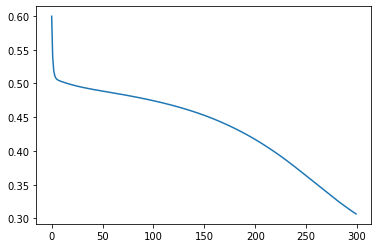

In [8]:
# Modules sequence
m1 = MS.Linear(2,25)
m2 = MS.Linear(25,25)
m3 = MS.Linear(25,25)
m4 = MS.Linear(25,2)
relu = MS.ReLu()
tanh = MS.Tanh()

model = SS.Sequential(m1,relu,m2,relu,m4,tanh)
# loss criterion
MSE = MS.MSE()
#train
losses = []
for e in range(300):
    output = model(data)
    loss = MSE.forward(output,target)/1000
    losses.append(loss.item())
    print("LOSS :::",loss)
    dl_dx = MSE.backward(output,target)
    #dividing dl_dx makes it stable somehow (or just reduce lr)
    model.zero_grad()
    model.backward(dl_dx)
    sgd = OS.SGD(model.param(),eta=9e-5)
    #Must initialize the optimizer here to give it the right parameters (after backward) to update
    sgd.step()
plt.plot(losses)

CROSSENTROPY

In [ ]:
# Modules sequence for 
m1 = MS.Linear(2,25)
m2 = MS.Linear(25,25)
m3 = MS.Linear(25,25)
m4 = MS.Linear(25,2)
relu = MS.ReLu()

model = SS.Sequential(m1,relu,m2,relu,m4,relu)
model.zero_grad()
# loss criterion
cross = MS.CrossEntropyLoss()
#train
for e in range(1000):
    output = model(data)
    loss = cross.forward(output,target)
    print("LOSS :::",loss)
    dl_dx = cross.backward(output,target)
    #dividing dl_dx makes it stable somehow (or just reduce lr)
    model.zero_grad()
    model.backward(dl_dx)
    sgd = OS.SGD(model.param(),eta=1000)
    #Must initialize the optimizer here to give it the right parameters (after backward) to update
    sgd.step()

LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(7.6009)
LOSS ::: tensor(